# Homework 1
### Riya Sheth
### 12365103
riyasheth@uchicago.edu

### Imports

In [449]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import functools
import seaborn as sns
quandl.ApiConfig.api_key= "dSEK8-iUMxdiDUyrcPdc"
import warnings
warnings.filterwarnings('ignore')

### Retrieving Data

In [456]:
@functools.lru_cache(maxsize=1600)
def fetch_quandl(my_data_items, trim_start=None, trim_end=None):
    qdata = quandl.get(list(my_data_items), returns="pandas", 
                      trim_start=trim_start, trim_end=trim_end,
                      api_key='dSEK8-iUMxdiDUyrcPdc')
    return qdata

In [451]:
def fetch_data():
    quarters= ['H', 'M', 'U', 'Z']
    years= ['2020', '2021', '2022']
    start_date= pd.Timestamp('2020-12-03')
    end_date= pd.Timestamp('2022-08-31')
    W= 'OWF/ICE_TFM_TFM_'
    X= 'OWF/NYM_NG_NG_'
    Y= 'OWF/CBT_FV_FV_'
    Z= 'OWF/CBT_TU_TU_'
    list_of_futures= [W, X, Y, Z]
    w_data= retrieve_dataframe(W, years, quarters, start_date, end_date)
    x_data= retrieve_dataframe(X, years, quarters, start_date, end_date)
    y_data= retrieve_dataframe(Y, years, quarters, start_date, end_date)
    z_data= retrieve_dataframe(Z, years, quarters, start_date, end_date)
    return w_data, x_data, y_data, z_data     

In [453]:
def retrieve_dataframe(future, years, quarters, start_date, end_date):
    counter=0
    list_of_frames= []
    for y in range(len(years)):
        for q in range(len(quarters)):
            retrieving_str= future+ quarters[q]+ years[y]+'_IVM'
            df= fetch_quandl((retrieving_str,))
            df= clean_quandl_columns(df)
            df.reset_index(inplace=True)
            list_of_frames.append(df)
            
            
    return list_of_frames

In [454]:
w_data, x_data, y_data, z_data= fetch_data()
start_date= pd.Timestamp('2020-12-03')
end_date= pd.Timestamp('2022-08-31')

In [455]:
w_df= pd.concat(w_data, ignore_index=True)
x_df= pd.concat(x_data, ignore_index=True)
y_df= pd.concat(y_data, ignore_index=True)
z_df= pd.concat(z_data, ignore_index=True)   

### Cleaning Data

In [457]:
def clean_quandl_columns(dataframe):
    replacement_columns = {}
    for c in dataframe.columns:
        series_name, variable = c.split(' - ')
        source_name, asset = series_name.split('/')
        replacement_columns[c] = variable
    renamed_data = dataframe.rename(columns=replacement_columns)
    return renamed_data

In [572]:
def cleaning_duplicate_dates_second_month_analysis(df):
    df= df.sort_values(by=['Date', 'DtT'])
    mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
    df = df.loc[mask]
    df= df.reset_index()
    df = df.iloc[: , 1:]
    current=0
    while current<len(df)-1:
        if df['Date'][current]!= df['Date'][current+1]:
            current= current+1
        else:
            dtt1= df['DtT'][current]
            dtt2= df['DtT'][current+1]
            if dtt1<=30:
                df= df.drop(current)
                df= df.reset_index(drop= True)
            else:
                df= df.drop(current+1)
                df= df.reset_index(drop=True)
    return df
     


In [478]:
w_df= cleaning_duplicate_dates_second_month_analysis(w_df) 
x_df= cleaning_duplicate_dates_second_month_analysis(x_df) 
y_df= cleaning_duplicate_dates_second_month_analysis(y_df) 
z_df= cleaning_duplicate_dates_second_month_analysis(z_df) 

### Describing Data

,Future,AtM,RR25,RR10,Fly25,Fly10,Beta1,Beta2,Beta3,Beta4,Beta5,Beta6,MinMoney,MaxMoney,DtE,DtT
count,449.000000,449.000000,297.000000,110.000000,297.000000,110.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000,449.000000
mean,76.336675,1.063071,0.198598,0.102385,0.055435,0.055373,0.337527,0.390500,-0.484329,-0.999173,0.331693,1.728971,-0.734058,0.658446,75.306303,76.639198
std,59.692044,0.479528,0.191363,0.161003,0.048017,0.036259,0.254339,0.338992,0.649924,2.219299,3.732159,9.397592,0.275227,0.273096,26.726384,26.722180
min,14.137000,0.372675,-0.029879,-0.060377,0.003280,-0.015048,-0.121877,-0.699098,-4.087782,-25.451168,-24.372574,-50.856377,-1.578168,0.133903,27.970000,31.000000
25%,24.451000,0.607416,0.043298,-0.022940,0.015667,0.031201,0.149693,0.159525,-0.753010,-1.662805,-0.084076,-0.180559,-0.943399,0.406766,51.970000,53.000000
50%,72.319000,1.083264,0.161653,0.067112,0.036868,0.043975,0.304738,0.369124,-0.432568,-0.526398,0.276679,0.216885,-0.710919,0.705351,75.970000,77.000000
75%,99.317000,1.459943,0.347730,0.108097,0.088970,0.058477,0.532229,0.594945,-0.064219,0.017308,0.799912,2.090606,-0.481554,0.932306,97.970000,100.000000
max,349.870000,2.347100,0.675414,0.758651,0.180382,0.209911,0.968335,2.078670,1.710400,11.888058,26.453376,148.836032,-0.243208,0.999422,123.970000,125.000000


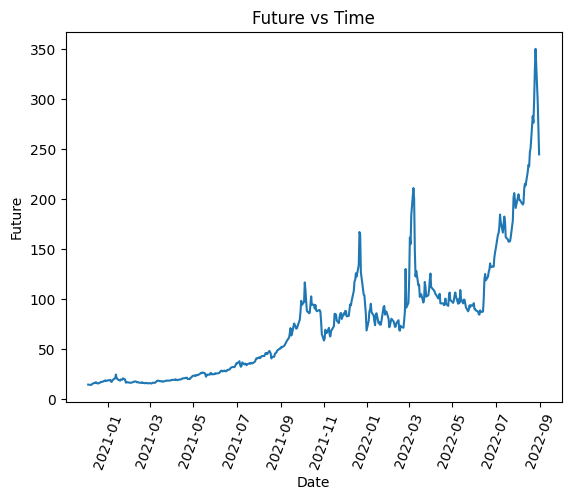

In [480]:
display(w_df.describe())
w_df_d= w_df.set_index('Date')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Future')
plt.title('Future vs Time')
plt.plot(w_df_d['Future'])

#### Data: ICE_TFM_TFM (ICE Dutch TTF Nat Gas TFM G2019 Futures Options)
Here, we see the Future Price was low in 2021, this could be explained by the pandemic which had worsened during the early months of 2021. We can also the steady growth from 2021 to 2022, which denotes that the economy was recovering. This also explains the high standard deviation found in the data, the average is 76 with the lowest being 14 and the highest being 350.

,Future,AtM,RR25,RR10,Fly25,Fly10,Beta1,Beta2,Beta3,Beta4,Beta5,Beta6,MinMoney,MaxMoney,DtE,DtT
count,453.000000,453.000000,453.000000,408.000000,453.000000,408.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,4.755903,0.599004,0.110434,0.152429,0.022842,0.041026,0.221281,0.158571,0.123924,2.919195,-4.846531,-10.257605,-0.461335,0.722263,75.161148,76.710817
std,1.976342,0.241412,0.126539,0.152278,0.026295,0.036985,0.252319,0.374003,1.692930,6.320163,16.135831,52.062788,0.145714,0.251431,26.557220,26.660481
min,2.329000,0.274061,-0.046217,-0.075507,-0.017520,-0.025583,-0.273933,-0.905953,-4.310354,-2.657281,-160.324574,-494.543963,-0.812453,0.216736,28.000000,31.000000
25%,3.007000,0.395352,0.013325,0.032650,0.004259,0.017238,0.034729,-0.093339,-0.824411,0.258727,-5.190594,-1.826435,-0.548647,0.461534,52.000000,54.000000
50%,4.252000,0.539858,0.085657,0.139781,0.014900,0.028066,0.250070,0.146506,-0.310420,1.008021,-0.299755,-0.516803,-0.442673,0.766148,75.000000,77.000000
75%,5.793000,0.803928,0.172246,0.233783,0.030925,0.059597,0.357100,0.355624,0.802527,2.557290,0.600184,0.450857,-0.346436,0.984570,98.000000,100.000000
max,9.810000,1.322626,0.583773,0.678313,0.127671,0.199159,0.814932,1.592010,11.125574,50.401773,11.633657,165.967191,-0.203118,0.999786,122.000000,125.000000


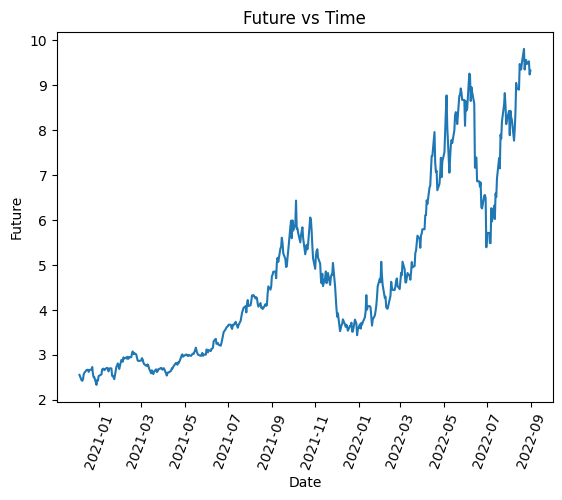

In [482]:
display(x_df.describe())
x_df_d= x_df.set_index('Date')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Future')
plt.title('Future vs Time')
plt.plot(x_df_d['Future'])

#### Data: NYM_NG_NG (NYM Natural Gas NG F2012 Futures Options)
The trends for this future option can be explained in a similar fashion as described for the previous ICE future option. However, the range of this future price is much smaller.

,Future,AtM,RR25,RR10,Fly25,Fly10,Beta1,Beta2,Beta3,Beta4,Beta5,Beta6,MinMoney,MaxMoney,DtE,DtT
count,453.000000,453.000000,429.000000,419.000000,429.000000,419.000000,453.000000,453.000000,453.000000,4.530000e+02,4.530000e+02,4.530000e+02,453.000000,453.000000,453.000000,453.000000
mean,120.152697,0.034767,-0.005241,-0.007518,0.000298,0.001911,-0.653497,-16.353362,19439.969934,2.656452e+06,-1.412971e+08,-2.085106e+10,-0.031277,0.024473,46.364525,83.955850
std,5.017839,0.015708,0.002520,0.004439,0.001021,0.001955,0.837162,144.903424,81080.318076,1.240546e+07,1.869378e+09,2.281032e+11,0.017132,0.016926,26.827752,26.716685
min,109.312500,0.012412,-0.015135,-0.026693,-0.012379,-0.008728,-6.307873,-1648.344288,-375634.489548,-2.575999e+07,-2.071630e+10,-2.629770e+12,-0.089041,-0.000336,1.210000,35.000000
25%,114.687500,0.023881,-0.006671,-0.009684,-0.000104,0.000648,-0.618678,-10.881780,253.194614,1.936426e+03,-2.900322e+06,-1.336453e+08,-0.040336,0.011995,23.210000,62.000000
50%,122.218750,0.029678,-0.005088,-0.007111,0.000356,0.001861,-0.431512,0.703742,939.537743,2.542558e+04,-4.554684e+05,-1.128049e+07,-0.027906,0.020055,45.210000,84.000000
75%,123.968750,0.047791,-0.003929,-0.005658,0.000816,0.003023,-0.286292,7.332042,3445.109125,1.419357e+05,-1.639853e+04,-8.118013e+04,-0.020723,0.033326,70.210000,106.000000
max,126.203125,0.105950,0.004483,0.008918,0.006423,0.009985,1.048997,809.613822,653134.245812,1.272667e+08,1.653079e+10,1.295946e+12,0.000187,0.072351,100.210000,140.000000


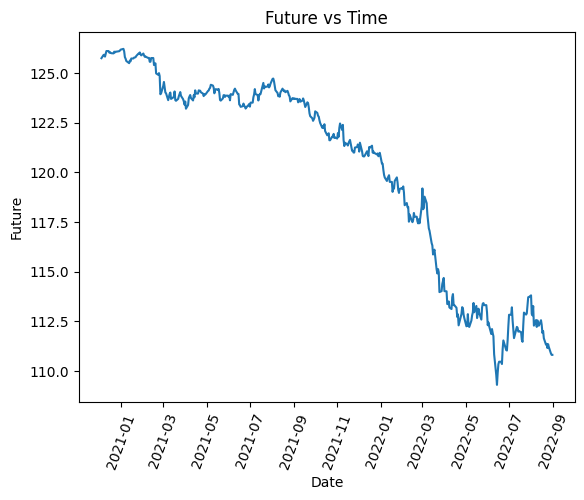

In [484]:
display(y_df.describe())
y_df_d= y_df.set_index('Date')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Future')
plt.title('Future vs Time')
plt.plot(y_df_d['Future'])

#### Data: CBT_FV_FV (5-Year US T-Notes FV2 H2016 Futures Options)
Here, we see the price of this particular future is decreasing from 2021 to 2022. A possible explanation for this would be lower treasury yields with investors weighing in recession risks.

,Future,AtM,RR25,RR10,Fly25,Fly10,Beta1,Beta2,Beta3,Beta4,Beta5,Beta6,MinMoney,MaxMoney,DtE,DtT
count,453.000000,453.000000,299.000000,223.000000,299.000000,223.000000,453.000000,453.000000,4.530000e+02,4.530000e+02,4.530000e+02,4.530000e+02,453.000000,453.000000,453.000000,453.000000
mean,108.559589,0.012588,-0.003288,-0.003684,0.000481,0.001507,-1.070824,-67.712076,2.989152e+05,5.984999e+07,-1.614548e+10,-2.127992e+12,-0.009804,0.007588,49.856799,87.399558
std,2.210038,0.009063,0.004588,0.002990,0.002723,0.002286,1.451622,673.483642,7.889800e+05,2.421565e+08,9.855539e+10,2.022315e+13,0.009953,0.008686,27.329013,27.052255
min,103.837500,0.002431,-0.069708,-0.022908,-0.005565,-0.003427,-13.994556,-4079.543497,-6.097343e+05,-7.768365e+08,-1.524107e+12,-3.584281e+14,-0.035720,-0.000963,1.210000,36.000000
25%,105.960938,0.004720,-0.004106,-0.005234,-0.000231,0.000517,-1.351232,-68.444740,4.064059e+02,-4.059653e+04,-9.797421e+08,-1.991490e+09,-0.015608,0.001557,28.210000,64.000000
50%,109.800000,0.007981,-0.002941,-0.003745,0.000318,0.001376,-0.667651,0.875198,1.197955e+04,2.550427e+03,-1.090152e+06,0.000000e+00,-0.004801,0.004055,50.210000,87.000000
75%,110.353125,0.021302,-0.001426,-0.002002,0.000789,0.002350,-0.313164,76.247984,2.709145e+05,1.602354e+07,0.000000e+00,0.000000e+00,-0.002040,0.011434,72.210000,111.000000
max,110.500000,0.049523,0.006139,0.006067,0.035672,0.024600,1.500000,4608.000000,1.128179e+07,2.569517e+09,4.563538e+11,7.211841e+13,0.000212,0.039090,112.210000,146.000000


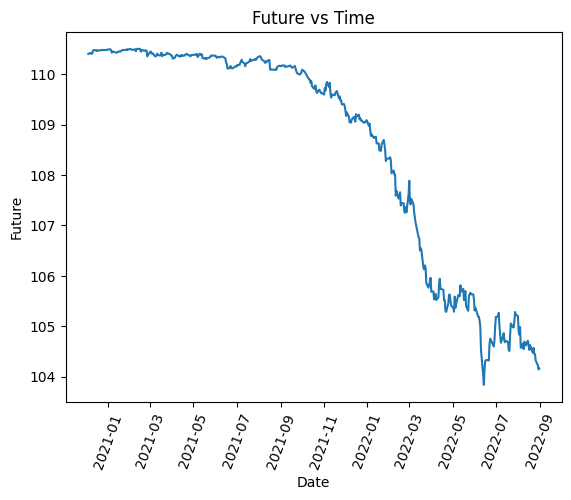

In [485]:
display(z_df.describe())
z_df_d= z_df.set_index('Date')
plt.xticks(rotation=70)
plt.xlabel('Date')
plt.ylabel('Future')
plt.title('Future vs Time')
plt.plot(z_df_d['Future'])

#### Data: CBT TU TU (2-Year US T-Notes TU Q2016 Futures Options)
The trends of this graph can be explained by the previous US T-noTES futures

### Creating Spreads
Spreading, a trade in which you simultaneously buy one futures contract and sell another, is a popular strategy among many different asset classes.
In the cases below we are exploring buying X and shorting a constant times W and buying Z and shorting a constant times Y.

In [486]:
spread_date_list=[]
spread_list=[]
for i in range(len(w_df)):
    for j in range(len(x_df)):
        if w_df['Date'][i]== x_df['Date'][j]:
            spread_date_list.append(w_df['Date'][i])
            spread_list.append(x_df['Future'][j]*13.7261-w_df['Future'][i])
spread_df_1= pd.DataFrame()
spread_df_1['Date']= spread_date_list
spread_df_1['Spread']= spread_list                 

In [487]:
spread_date_list=[]
spread_list=[]
for i in range(len(y_df)):
    for j in range(len(z_df)):
        if y_df['Date'][i]== z_df['Date'][j]:
            spread_date_list.append(y_df['Date'][i])
            spread_list.append(z_df['Future'][j]*1.1066- y_df['Future'][i])
spread_df_2= pd.DataFrame()
spread_df_2['Date']= spread_date_list
spread_df_2['Spread']= spread_list 


### Checking the spread values against the ones given in the FuturesSpreadDataCharacterization.pdf

In [488]:
#spread 1
for i in range(len(spread_df_1)):
    if spread_df_1['Date'][i]== pd.Timestamp('2021-10-25'):
        print(spread_df_1['Date'][i], spread_df_1['Spread'][i])
    if spread_df_1['Date'][i]== pd.Timestamp('2021-10-28'):
        print(spread_df_1['Date'][i], spread_df_1['Spread'][i])
    if spread_df_1['Date'][i]== pd.Timestamp('2021-11-01'):
        print(spread_df_1['Date'][i], spread_df_1['Spread'][i])      

2021-10-25 00:00:00 -5.751738399999994
2021-10-28 00:00:00 -2.985990199999989
2021-11-01 00:00:00 9.013603199999999


In [489]:
#spread 2
for i in range(len(spread_df_2)):
    if spread_df_2['Date'][i]== pd.Timestamp('2021-11-25'):
        print(spread_df_2['Date'][i], spread_df_2['Spread'][i])
    if spread_df_2['Date'][i]== pd.Timestamp('2021-11-26'):
        print(spread_df_2['Date'][i], spread_df_2['Spread'][i])   

2021-11-25 00:00:00 0.15630562500001588
2021-11-26 00:00:00 -0.18187656249999407


### Analysis

In [286]:
spread_df_1.describe()

,Spread
count,449.000000
mean,-10.968279
std,41.527363
min,-219.842655
25%,-27.637404
50%,9.013603
75%,17.162326
max,42.048807


This trading position on an average as seen by the mean is not profitable. However, with the standard deviation of 41 and the maximum spread of 42, it is evident that this position could be exploited at appropriate times to make a profit

In [346]:
spread_df_2.describe()

,Spread
count,453.000000
mean,-0.020656
std,2.619427
min,-3.932470
25%,-1.882597
50%,-0.682566
75%,2.568873
max,5.594078


This trading position as seen by the mean indicates that it is much safer than the previous spread-1. However, the profit margins are lower.

In [491]:
spread_df_1= spread_df_1.set_index('Date')
spread_df_2= spread_df_2.set_index('Date')

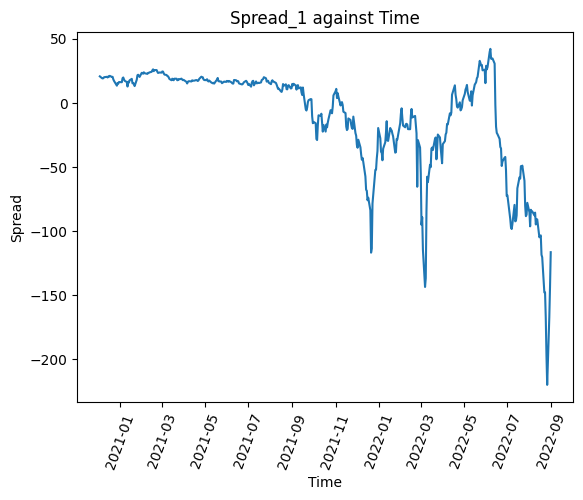

In [492]:
plt.xlabel('Time')
plt.ylabel('Spread')
plt.xticks(rotation=70)
plt.title('Spread_1 against Time')
plt.plot(spread_df_1)

The w_data had a sharp increase for the expirations between 2021 and 2022 with a few spikes and a few troughs on the side of the x_data. Hence this position seems very volatile and overall does not seem like a great trading strategy. 

Do spreads exhibit patterns over time?

The entire of 2021 there were hardly any sharp changes or drawdowns. However, in 2022 there were quite a few drawdowns.

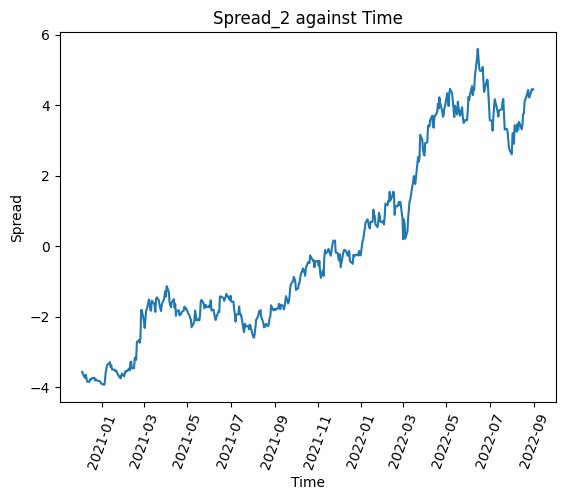

In [493]:
plt.xlabel('Time')
plt.ylabel('Spread')
plt.xticks(rotation=70)
plt.title('Spread_2 against Time')
plt.plot(spread_df_2)

Here, we see a steady increase in the spreads for the expirations between 2021 and 2022. Hence, is it advantageous to be in this trading position. We see a slight dip near July 2022, however, the curve looks upward again and hence it could potentially be a profitable trade.

Do spreads exhibit patterns over time?

All in all, the trends showed a steadily increasing spread with few drawdowns

### Difference calculations of the spread

In [365]:
def difference_calculation(spread, N):
    difference_spread=[]
    for i in range(len(spread)-N):
        sum=0
        for j in range(N):
            sum= sum+ spread['Spread'][i+j]
        sum= sum/N
        difference_spread.append(spread['Spread'][i]-sum)
    difference_dataframe= pd.DataFrame()
    difference_dataframe['Spread_Difference']= difference_spread 
    difference_dataframe['Date']= spread.index[:len(difference_spread)]
    difference_dataframe= difference_dataframe.set_index('Date')
    return difference_dataframe

In [1]:
def heatmap_pandas(corr):
    mask = np.zeros_like(corr, dtype=bool)
    mask[np.tril_indices_from(mask)] = True  
    corr[mask] = np.nan

    # display the styler
    display(corr       
     .style
     .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
     .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
     .set_precision(2))
def analysis_difference_calculation():
    
    print('*'*100)
    print("X and W")
    print('*'*100)
    
    list_N= [5, 10, 20, 30, 50]
    list_of_difference1=[]
    list_of_difference2=[]
    for i in range(len(list_N)):
        d_df1= difference_calculation(spread_df_1, list_N[i])
        d_df2= difference_calculation(spread_df_2, list_N[i])
        list_of_difference1.append(d_df1)
        list_of_difference2.append(d_df2)
    describe_list_1=[]
    describe_list_2=[]
    for i in range(len(list_of_difference1)):
        describe_list_1.append(list_of_difference1[i].describe())
        plt.plot(list_of_difference1[i], label = list_N[i])
    plt.xlabel('Time')
    plt.ylabel('Spread_Difference')
    plt.xticks(rotation=70)
    plt.title('Spread Difference of different N (for W and X) against Time')
    plt.legend()
    plt.show() 
    describe_df1= pd.concat(describe_list_1, axis=1)
    columns=[]
    for i in range(len(list_N)):
        string= "Difference_" + str(list_N[i])
        columns.append(string)
    describe_df1.columns= columns
    display(describe_df1)
    tail_list_1=[]
    for i in range(len(list_of_difference1)):
        temp= list_of_difference1[i].tail()
        list_t= list(temp['Spread_Difference'])
        temp_df= pd.DataFrame(list_t)
        tail_list_1.append(temp_df)
    tail_df1= pd.concat(tail_list_1, axis=1, ignore_index= True)
    columns=[]
    for i in range(len(list_N)):
        string= "Tail_" + str(list_N[i])
        columns.append(string)
    tail_df1.columns= columns
    display(tail_df1)
    corr_df=pd.DataFrame()
    for i in range(len(list_of_difference1)):
        corr_df['N_'+ str(list_N[i])]= list(list_of_difference1[i]['Spread_Difference'])[:399]
    corr_matrix1 = corr_df.corr()  
    heatmap_pandas(corr_matrix1)   
  
    
    print('*'*100)
    print("Y and Z")
    print('*'*100)
    
    for i in range(len(list_of_difference2)):
        describe_list_2.append(list_of_difference2[i].describe())
        plt.plot(list_of_difference2[i], label = list_N[i])
    
    plt.xlabel('Time')
    plt.ylabel('Spread_Difference')
    plt.xticks(rotation=70)
    plt.title('Spread Difference of different N (for Y and Z) against Time')
    plt.legend()
    plt.show() 
    describe_df2= pd.concat(describe_list_2, axis=1)
    columns=[]
    for i in range(len(list_N)):
        string= "Difference_" + str(list_N[i])
        columns.append(string)
    describe_df2.columns= columns
    display(describe_df2)
    tail_list_2=[]
    for i in range(len(list_of_difference2)):
        temp= list_of_difference2[i].tail()
        list_t= list(temp['Spread_Difference'])
        temp_df= pd.DataFrame(list_t)
        tail_list_2.append(temp_df)
    tail_df2= pd.concat(tail_list_2, axis=1, ignore_index= True)
    columns=[]
    for i in range(len(list_N)):
        string= "Tail_" + str(list_N[i])
        columns.append(string)
    tail_df2.columns= columns
    display(tail_df2)
    corr_df=pd.DataFrame()
    for i in range(len(list_of_difference2)):
        corr_df['N_'+ str(list_N[i])]= list(list_of_difference2[i]['Spread_Difference'])[:403]
    corr_matrix = corr_df.corr()
    heatmap_pandas(corr_matrix) 

    

In [2]:
analysis_difference_calculation()


****************************************************************************************************
X and W
****************************************************************************************************


NameError: name 'difference_calculation' is not defined

### General Observations
The N large values have a lot of volatility of the standard deviation is higher compared to the lower ones. That is obvious as seen in both the spread graphs there is a trend either diagnally up or diagonally down. Hence, the values closer to s-t will be similar to s-t and a higher N would average that out greatly. 

This also explains the heatmaps. Since, there are trends the N values closer to each other show greater correlation in both the cases.

The difference tail values for 50 is higher than that of the other, because the standard deviation is higher, that is averaging 50 values does not estimat s-t as well as averaging fewer values does.

The differences are greatly augmented for higher N.

In [536]:
def correlation_spreads():
    correlation_df= pd.DataFrame()
    correlation_df['Spread_1']= spread_df_1['Spread']
    correlation_df['Spread_2']= spread_df_2['Spread']
    corr_matrix = correlation_df.corr()
    sns.heatmap(corr_matrix, annot=True)
def correlation_futures():
    new_correlation_df= pd.DataFrame()
    new_correlation_df['Futures_w']= w_df['Future']
    new_correlation_df['Futures_x']= x_df['Future']
    new_correlation_df['Futures_y']= y_df['Future']
    new_correlation_df['Futures_z']= z_df['Future']
    corr_matrix = new_correlation_df.corr()
    sns.heatmap(corr_matrix, annot=True)
    print(corr_matrix)  

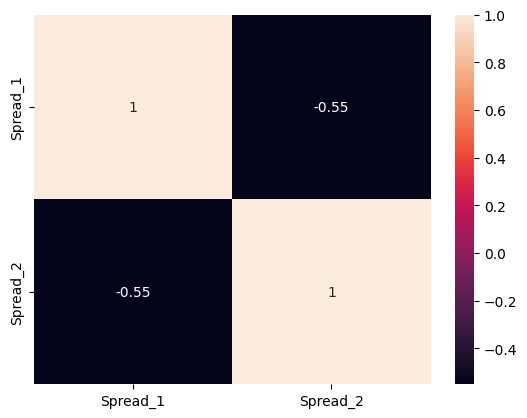

In [538]:
(correlation_spreads())

There isn't notable correlation between spread 1 and spread 2

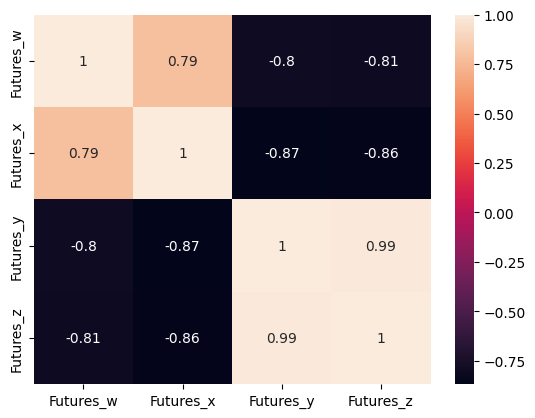

In [415]:
correlation_futures()

The future y and z, the 5-year and 2-year T-notes are highly correlated which could result in having a trading strategy for y and z trickier.
The future w and x, the natural gas futures are not that highly correlated which could result in a potential trading strategy for w and x,
The futures w and x are highly correlated to y and x. 


In [553]:
def kurtosis():
    w_k= w_df.kurtosis()
    x_k= x_df.kurtosis()
    y_k= y_df.kurtosis()
    z_k= z_df.kurtosis()
    k_columns= ['kurtosis_w', 'kurtosis_x', 'kurtosis_y', 'kurtosis_z']
    k_list= [w_k, x_k, y_k, z_k]
    kurtosis_pd= pd.concat(k_list, axis=1)
    kurtosis_pd.columns= k_columns
    display(kurtosis_pd)
    spread_k1= spread_df_1.kurtosis()
    spread_k2= spread_df_2.kurtosis()
    kurtosis_pd1= pd.concat([spread_k1, spread_k2], axis=1)
    kurtosis_pd1.columns= ['spread_1_kurtosis', 'spread_2_kurtosis']
    display(kurtosis_pd1)     
kurtosis()

,kurtosis_w,kurtosis_x,kurtosis_y,kurtosis_z
Future,2.515555,-0.312734,-1.091569,-1.034136
AtM,-0.999847,-0.882227,0.038601,-0.593313
RR25,-0.648165,2.144499,2.580696,149.349597
RR10,2.806750,0.634354,3.625252,7.293621
Fly25,-0.353686,3.032411,57.859771,108.049940
Fly10,3.274525,3.151706,2.263745,47.751186
Beta1,-0.503437,-0.434021,14.049950,24.741966
Beta2,1.821892,1.567765,48.586346,11.430943
Beta3,3.724270,12.560713,20.567636,85.694022
Beta4,38.540765,19.238618,41.907703,41.076730


,spread_1_kurtosis,spread_2_kurtosis
Spread,3.253507,-1.05141


Kurtosis: Data sets with low kurtosis tend to have light tails, or lack of outliers.
Hence, the data from spread 2 has lack of outliers which means the trading position is more stable as compared to the trading position.

In [554]:
def skewness():
    w_k= w_df.skew()
    x_k= x_df.skew()
    y_k= y_df.skew()
    z_k= z_df.skew()
    k_columns= ['skew_w', 'skew_x', 'skew_y', 'skew_z']
    k_list= [w_k, x_k, y_k, z_k]
    skew_pd= pd.concat(k_list, axis=1)
    skew_pd.columns= k_columns
    display(skew_pd)
    
    spread_k1= spread_df_1.skew()
    spread_k2= spread_df_2.skew()
    skew_pd1= pd.concat([spread_k1, spread_k2], axis=1)
    skew_pd1.columns= ['spread_1_skew', 'spread_2_skew']
    display(skew_pd1)
      
skewness()

,skew_w,skew_x,skew_y,skew_z
Future,1.419610,0.862484,-0.663880,-0.804424
AtM,0.198685,0.478764,0.771190,0.698566
RR25,0.746197,1.396485,0.071665,-10.607454
RR10,1.660636,0.822257,0.045946,-1.165237
Fly25,0.904529,1.709395,-4.282063,9.127520
Fly10,1.765366,1.606748,-0.014112,5.090711
Beta1,0.362849,0.116106,-3.436631,-3.946138
Beta2,0.612760,0.673040,-4.612386,-0.751589
Beta3,-0.906320,2.815256,3.389062,7.277942
Beta4,-3.603954,4.067703,5.867997,5.314404


,spread_1_skew,spread_2_skew
Spread,-1.725196,0.465209


Skewness tells us the direction of outliers. In a positive skew, the tail of a distribution curve is longer on the right side. 
The skewness of spread_1 is negative which indicates that the distribution curve is longer on the left side which is not ideal in a trading strategy. spread_2 consequently gives a better trading strategy.

In [441]:
def autocorrelation(spread_df):
    lags= range(40)
    acorr= len(lags)*[0]
    mean= sum(spread_df['Spread'])/len(spread_df)
    var = sum([(x - mean)**2 for x in spread_df['Spread']]) / len(spread_df)
    ndata = [x - mean for x in spread_df['Spread']]
    for l in lags:
        c = 1 
        if (l > 0):
            tmp = [ndata[l:][i] * ndata[:-l][i] 
                   for i in range(len(spread_df['Spread']) - l)]
            c = sum(tmp) / len(spread_df) / var
        acorr[l] = c
    plt.plot(lags, acorr)
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelation')
    plt.title('Lags vs Autocorrelation')

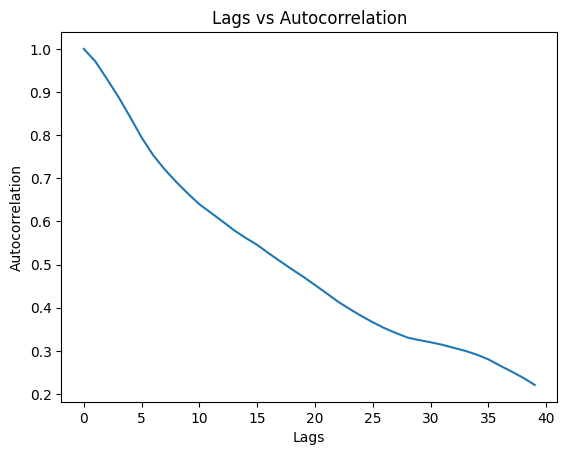

In [442]:
autocorrelation(spread_df_1)

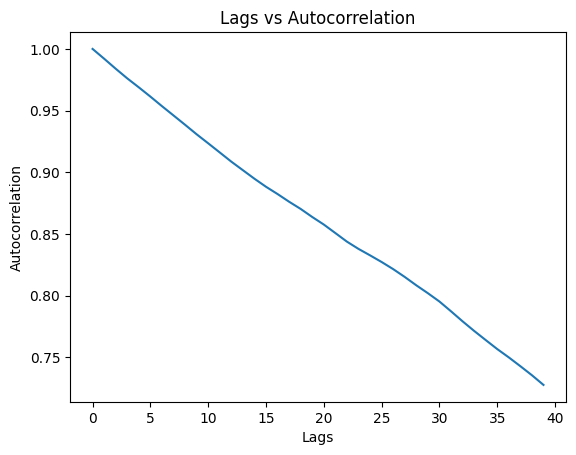

In [443]:
autocorrelation(spread_df_2)

The graphs above indicate the presence of a trend or indicates that the futures price behaves in essence like a markov chain because mostly the only values need to predict the future is the previous.

### Event Analysis
One of the major events which affected the trends of these futures was the pandemic. We see extremely low values for natural gas in the beginning which the steadily increased as the effects of the pandemic started wearing down. However the pandemic increased fears of a recession among investors and hence the prices of the t-notes went lower.